In [50]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import DistanceMetric
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

TITANIC_TRAINING_DATA = '/Users/seleniumk/401/statistics/train.csv'
# TITANIC_TESTING_DATA = '/Users/danielzwelling/Documents/coding_stuff/code_fellows/python-401/Pod1/test.csv'
titanic_dataframe = pd.read_csv(TITANIC_TRAINING_DATA, header=0)



In [37]:
# How Big?
bigness_of_data = len(titanic_dataframe)
print("How Big? {}".format(bigness_of_data))

How Big? 891


In [92]:
# What Columns?
titanic_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
# Average Age ...
# Titanic Passenger
av_age = np.mean(titanic_dataframe.Age)
print("Average age of passenger: {}".format(av_age))
# survivor
survivors = titanic_dataframe[titanic_dataframe.Survived == 1]
av_surv_age = np.mean(survivors.Age)
print("Average age of Survivors: {}".format(av_surv_age))
# non-surviving first-class passenger
non_survivors = titanic_dataframe[titanic_dataframe.Survived == 0]
first_class_survivors = non_survivors[non_survivors.Pclass == 1]
average_first_class_survivor_age = np.mean(first_class_survivors.Age)
print("Average age of a non-surviving first-class passenger: {}".format(average_first_class_survivor_age))
# Male survivors older than 30 from anywhere but Queenstown
survivors_over_30 = survivors[survivors.Age > 30]
male_suv = survivors_over_30[survivors_over_30.Sex == "male"]
not_from_q = male_suv[male_suv.Embarked != "Q"]
av_male_survivors = np.mean(not_from_q.Age)
print("Average age of male survivors older than 30 from anywhere but Queenstown: {}".format(av_male_survivors))


Average age of passenger: 29.69911764705882
Average age of Survivors: 28.343689655172415
Average age of a non-surviving first-class passenger: 43.6953125
Average age of male survivors older than 30 from anywhere but Queenstown: 41.48780487804878


In [41]:
# What is the most common...
# Passenger Class
mode = titanic_dataframe['Pclass'].mode()[0]
print("Most common Passenger class: {}".format(mode))
# Port of Embarkation
destinations = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
embark_mode = titanic_dataframe['Embarked'].mode()[0]
print("Most common Embarkation point: {}".format(embark_mode))
# Number of siblings/spouses for survivors
print("Most common number of siblings/spouses for survivors: {}".format(survivors.SibSp.mode()[0]))

Most common Passenger class: 3
Most common Embarkation point: S
Most common number of siblings/spouses for survivors: 0


In [43]:
# Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? 
#Is it above or below the mean?
mean_fare = np.mean(titanic_dataframe['Fare'])
median_fare = titanic_dataframe.median()['Fare']
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
if mean_fare > median_fare:
    print("The mean fare is higher than the median fare")
elif median_fare > mean_fare:
    print("The median fare is higher than the mean fare")
else:
    print("The median fare and mean fare are identical")



Mean Fare: 32.2042079685746
Median Fare: 14.4542
The mean fare is higher than the median fare


In [91]:
# How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?
fifth_percentile = titanic_dataframe.quantile(0.05)['Fare']
fifth_percentile_class = titanic_dataframe.quantile(0.05)['Pclass']
print("5th Percentile Ticket Price: ${} (Class: {})".format(fifth_percentile, fifth_percentile_class))
ninezero_percentile = titanic_dataframe.quantile(0.90)['Fare']
ninezero_percentile_class = titanic_dataframe.quantile(0.90)['Pclass']
print("90th Percentile Ticket Price: ${} (Class: {})".format(ninezero_percentile, ninezero_percentile_class))
print("Difference in price: $%f" % (ninezero_percentile - fifth_percentile))
if fifth_percentile_class == ninezero_percentile_class:
    print("Tickets are same class")
else:
    print("Tickets are different class")

5th Percentile Ticket Price: $7.225 (Class: 1.0)
90th Percentile Ticket Price: $77.9583 (Class: 3.0)
Difference in price: $70.733300
Tickets are different class


In [45]:
# The highest average ticket price was paid by passengers from which port? Null ports don’t count
from_S = titanic_dataframe[(titanic_dataframe.Embarked == "S")].Fare.mean()
from_C = titanic_dataframe[(titanic_dataframe.Embarked == "C")].Fare.mean()
from_Q = titanic_dataframe[(titanic_dataframe.Embarked == "Q")].Fare.mean()
average_fare = {
    from_S: 'Southhampton',
    from_C: 'Cherbourg',
    from_Q: 'Queenstown',
}
print("Average Fare from Southampton: $%.2f" % from_S)
print("Average Fare from Cherbourg: $%.2f" % from_C)
print("Average Fare from Queenstown: $%.2f" % from_Q)
highest_fare = max(average_fare.keys())
print("Highest Priced Port:", average_fare[highest_fare])

In [46]:
# Which port has passengers from the most similar passenger class?
from_S = titanic_dataframe[(titanic_dataframe.Embarked == "S")].describe().Pclass['std']
from_C = titanic_dataframe[(titanic_dataframe.Embarked == "C")].describe().Pclass['std']
from_Q = titanic_dataframe[(titanic_dataframe.Embarked == "Q")].describe().Pclass['std']
std_dict = {  # LOLOLOL
    from_S: 'Southhampton',
    from_C: 'Cherbourg',
    from_Q: 'Queenstown',
}
low_std = min(std_dict.keys())
print("Smallest sigma is from:", std_dict.get(low_std))

In [47]:
# What fraction of surviving 1st-class males paid lower than the overall median ticket price?

In [48]:
# How much older/younger was the average surviving passenger with family members than the average non-surviving 
# passenger without them?
av_age_surviving_with_family = np.mean(survivors[survivors.SibSp > 0].Age)
nonsurvivors = titanic_dataframe[titanic_dataframe.Survived == 0]
av_age_nonsurviving_without_family = np.mean(nonsurvivors[nonsurvivors.SibSp == 0].Age)
if av_age_surviving_with_family > av_age_nonsurviving_without_family:
    older_younger = "older"
else:
    older_younger = "younger"
difference = np.absolute(av_age_surviving_with_family - av_age_nonsurviving_without_family)
print("Average age of Surviving with family ( {} ) was {} years {} than the average age of nonsurviving without family ( {} )".format(
        av_age_surviving_with_family,
        difference,
        older_younger,
        av_age_nonsurviving_without_family))

Average age of Surviving with family ( 26.990608695652174 ) was 5.686756169212689 years younger than the average age of nonsurviving without family ( 32.67736486486486 )


/Users/seleniumk/anaconda3/envs/conda_env/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[7.2249999999999996, 7.5499999999999998, 7.75, 7.8541999999999996, 7.9104000000000001, 8.0500000000000007, 9.0, 10.5, 13.0, 14.4542, 16.100000000000001, 21.679200000000002, 26.0, 27.0, 31.0, 39.6875, 56.495800000000003, 77.958299999999994, 112.07915, 512.32920000000001]
[0.25, 0.25, 0.35294117647058826, 0.23076923076923078, 0, 0.11627906976744186, 0.0, 0.375, 0.38095238095238093, 0.14285714285714285, 0.2222222222222222, 0.0, 0.4838709677419355, 0.5, 0.6666666666666666, 0.0, 0.7142857142857143, 1.0, 0, 1.0]


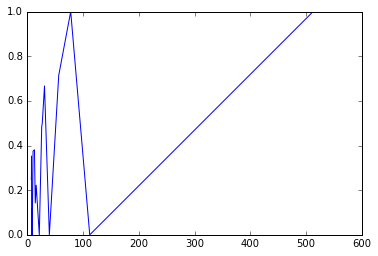

In [90]:
# Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 
# 20 integer quantiles. Make sure you label your axes
quantile_ticket_prices = [titanic_dataframe['Fare'].quantile(x * .01) for x in range(5, 101, 5)]

all_pass = [len(titanic_dataframe[titanic_dataframe['Fare'] == x]) for x in quantile_ticket_prices] 
surv_pass = [len(titanic_dataframe[titanic_dataframe['Fare'] == x][titanic_dataframe['Survived'] == 1]) for x in quantile_ticket_prices] 
percentage_surv = []
for x in range(0, 20):
    if all_pass[x] == 0:
        percentage_surv.append(0)
    else:
        percentage_surv.append(surv_pass[x]/all_pass[x])
        
print(quantile_ticket_prices)
        
print(percentage_surv)
        
plt.plot(quantile_ticket_prices, percentage_surv)
plt.show()


In [ ]:
# For each of the following characteristics, find the median in the data.
#age
# ticket price

# siblings/spouses
# parents/children

In [ ]:
# If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, 
# which of these characteristics would be the best choice and why?
survived = titanic_dataframe[(titanic_dataframe.Survived == 1)]
best_age = survived.Age.mode()[0]
best_fare = survived.Fare.mode()[0]
best_sibsp = survived.SibSp.mode()[0]
best_parch = survived.Parch.mode()[0]
best_gender = survived.Sex.mode()[0]
best_class = survived.Pclass.mode()[0]
print("Best Age:", best_age)
print("Best Gender:", best_gender)
print("Best Fare:", best_fare)
print("Best Class:", best_class)
print("Best Sibling/Spouse Status:", best_sibsp)
print("Best Parent/Child Status:", best_parch)